# Setting Up Qiskit

In [515]:
import qiskit

import qiskit.visualization

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [516]:
qiskit.__version__

'1.0.2'

In [517]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
def start_service(token_given : str = None):

    global service

    # Save an IBM Quantum account and set it as your default account.
    QiskitRuntimeService.save_account(channel="ibm_quantum", token= token_given, set_as_default=True, overwrite=True)
 
    # Load saved credentials
    service = QiskitRuntimeService()

In [518]:
def set_backend():

    global service

    global backend

    backend = service.backend("ibmq_qasm_simulator")
 

# Random Number Generator

In [519]:
def set_qubits(n):
    global circuit
    qr = qiskit.QuantumRegister(n)
    cr = qiskit.ClassicalRegister(n)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.h(qr) # Apply Hadamard gate to qubits
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.


In [520]:
start_service("db98e2357081d10c2187bdafae7b6427933b39c26df1ec72c0950e95b57048bf469de26739b8a4af5e9007f6ee644d18188cbfc0957c669101e65db5c042722c")

In [521]:
set_backend()

In [522]:
def get_random_int5():
    set_qubits(5)

    
    new_circuit = qiskit.transpile(circuit, backend)
    job = backend.run(new_circuit)

    result = job.result()

    str = ''

    for i in range(1):
        str += next(iter(result.get_counts()))

    decimal_value = int(str, 2)

    return str,decimal_value

In [523]:

def get_random_int8():
    set_qubits(8)

    
    new_circuit = qiskit.transpile(circuit, backend)
    job = backend.run(new_circuit)

    result = job.result()

    str = ''

    for i in range(1):
        str += next(iter(result.get_counts()))

    decimal_value = int(str, 2)

    return str,decimal_value




In [524]:

def get_random_int16():
    set_qubits(8)


    new_circuit = qiskit.transpile(circuit, backend)
    job = backend.run(new_circuit)

    result = job.result()

    str = ''

    for i in range(2):
        str += next(iter(result.get_counts()))

    decimal_value = int(str, 2)

    return str,decimal_value




In [525]:

def get_random_int32():
    set_qubits(8)


    new_circuit = qiskit.transpile(circuit, backend)
    job = backend.run(new_circuit)

    result = job.result()

    str = ''

    for i in range(4):
        str += next(iter(result.get_counts()))

    decimal_value = int(str, 2)

    return str, decimal_value




In [526]:
def get_random_int64():
    set_qubits(8)


    new_circuit = qiskit.transpile(circuit, backend)
    job = backend.run(new_circuit)

    result = job.result()

    str = ''

    for i in range(8):
        str += next(iter(result.get_counts()))

    decimal_value = int(str, 2)

    return str,decimal_value

## Example for Random Number Generator (5 bits)

In [527]:
print(get_random_int5())
print(get_random_int5())


('10100', 20)
('00010', 2)


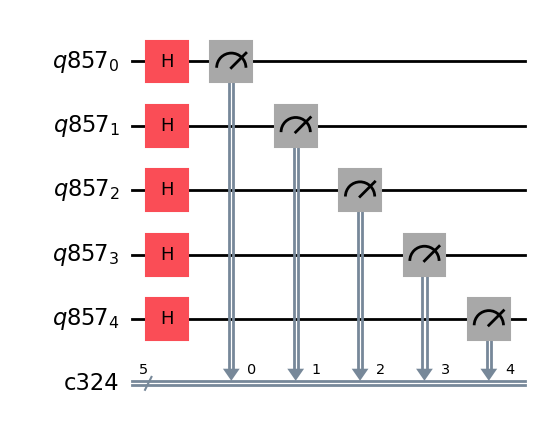

In [528]:
circuit.draw(output = 'mpl')

## Example for Random Number Generator(8 bits, 16 bits, 32 bits, 64 bits)

In [529]:
print(get_random_int8())
print(get_random_int8())

print(get_random_int16())
print(get_random_int16())

print(get_random_int32())
print(get_random_int32())

print(get_random_int64())
print(get_random_int64())


('00110111', 55)
('10001001', 137)
('0101010001010100', 21588)
('1111010011110100', 62708)
('00100001001000010010000100100001', 555819297)
('00001100000011000000110000001100', 202116108)
('0011100000111000001110000011100000111000001110000011100000111000', 4051049678932293688)
('1101000111010001110100011101000111010001110100011101000111010001', 15119096123158024657)


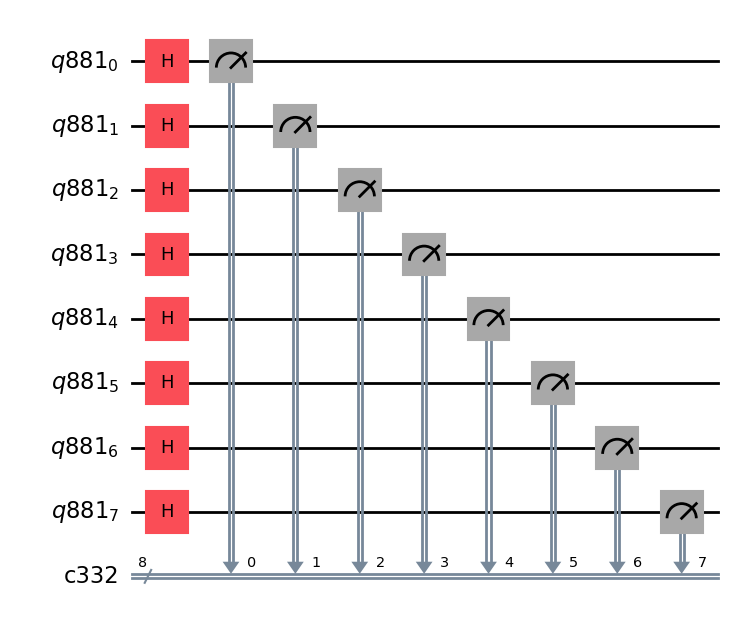

In [530]:
circuit.draw(output = 'mpl')

# Quantum Gates

In [531]:
def bit_flip_gate_zero_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.x(qr) 
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

In [532]:
def bit_flip_gate_one_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.x(qr) 
    circuit.x(qr) 
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

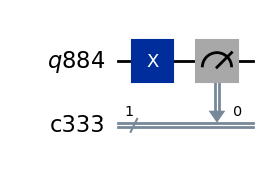

In [533]:
bit_flip_gate_zero_qubit().draw(output = 'mpl')

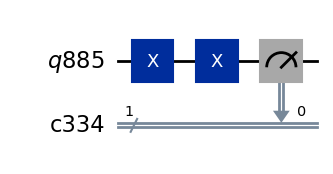

In [534]:
bit_flip_gate_one_qubit().draw(output = 'mpl')

In [535]:
def phase_flip_gate_zero_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.z(qr)
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

In [536]:
def phase_flip_gate_one_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.x(qr)
    circuit.z(qr)
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

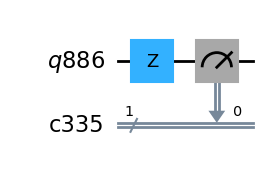

In [537]:
phase_flip_gate_zero_qubit().draw(output = 'mpl')

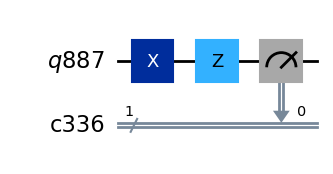

In [538]:
phase_flip_gate_one_qubit().draw(output = 'mpl')

## Example for Bit Flip Gate

In [539]:
new_circuit = qiskit.transpile(bit_flip_gate_zero_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()


result.get_counts()

{'1': 4000}

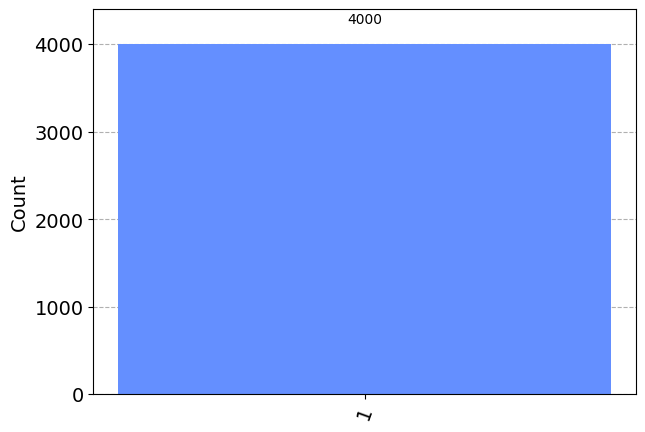

In [540]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')


In [541]:

new_circuit = qiskit.transpile(bit_flip_gate_one_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()


result.get_counts()



{'0': 4000}

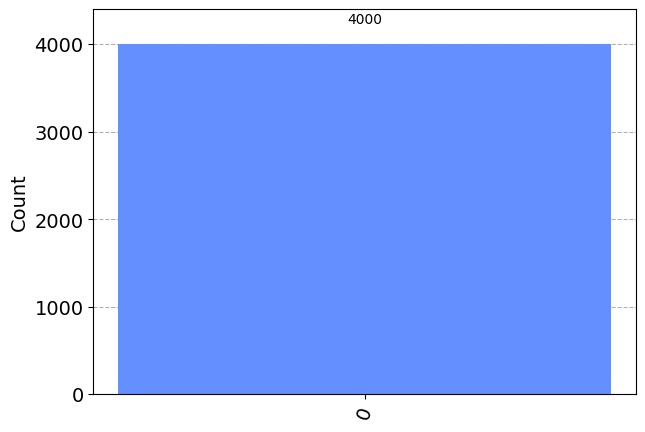

In [542]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')


## Example for Phase Flip Gate

In [543]:
new_circuit = qiskit.transpile(phase_flip_gate_zero_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()


result.get_counts()

{'0': 4000}

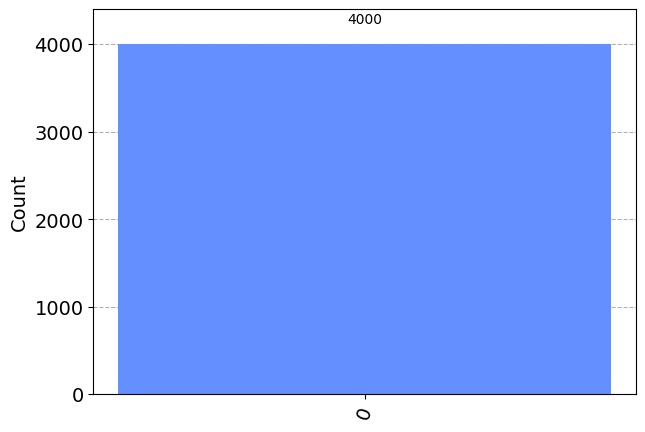

In [544]:

qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

In [545]:
new_circuit = qiskit.transpile(phase_flip_gate_one_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'1': 4000}

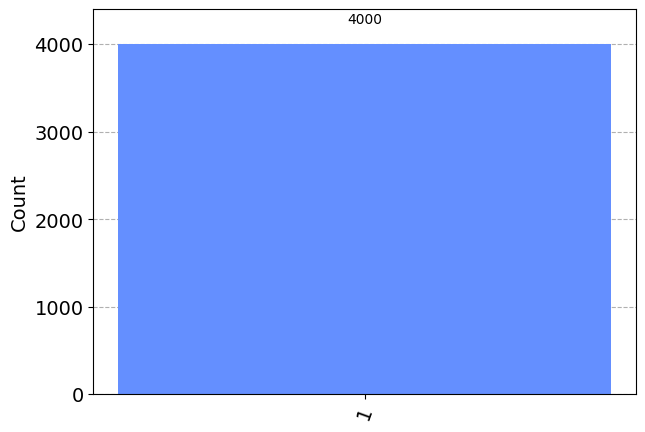

In [546]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

In [547]:
def hadmard_gate_zero_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.h(qr)
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

In [548]:
def hadmard_gate_one_qubit():
    qr = qiskit.QuantumRegister(1)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    circuit.x(qr)
    circuit.h(qr)
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

## Example for Hadmard Gate

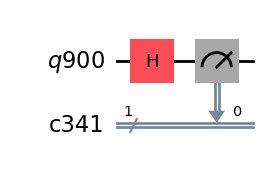

In [549]:
hadmard_gate_zero_qubit().draw(output = 'mpl')

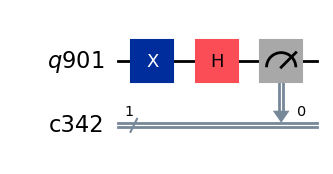

In [550]:
hadmard_gate_one_qubit().draw(output = 'mpl')

In [551]:
new_circuit = qiskit.transpile(hadmard_gate_zero_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()


result.get_counts()


{'1': 1971, '0': 2029}

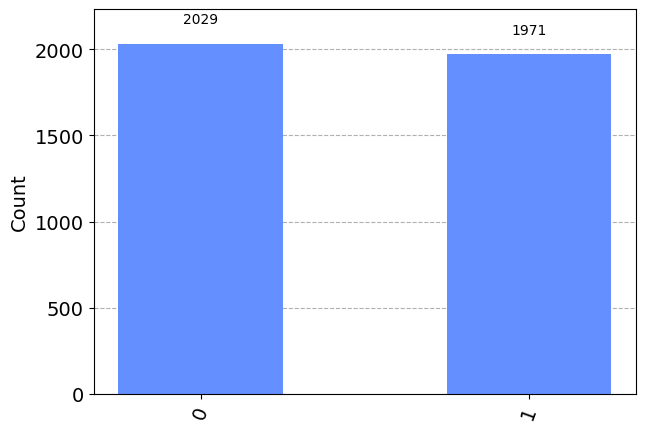

In [552]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

In [553]:
new_circuit = qiskit.transpile(hadmard_gate_one_qubit(), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()


{'0': 2001, '1': 1999}

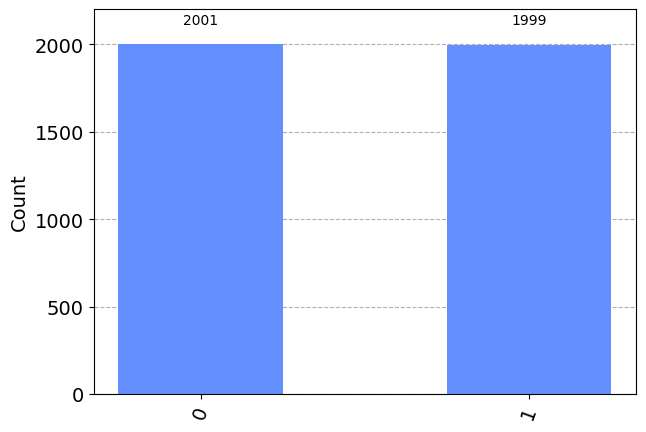

In [554]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

## Example for Control Not Gate

In [555]:
def control_not_gate(q1, q2):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    qr = qiskit.QuantumRegister(2)
    cr = qiskit.ClassicalRegister(2)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)

    circuit.cx(0,1)
        
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit
    

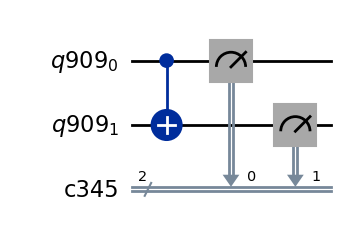

In [556]:
control_not_gate(0, 0).draw(output = 'mpl')

In [557]:
new_circuit = qiskit.transpile(control_not_gate(0, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'00': 4000}

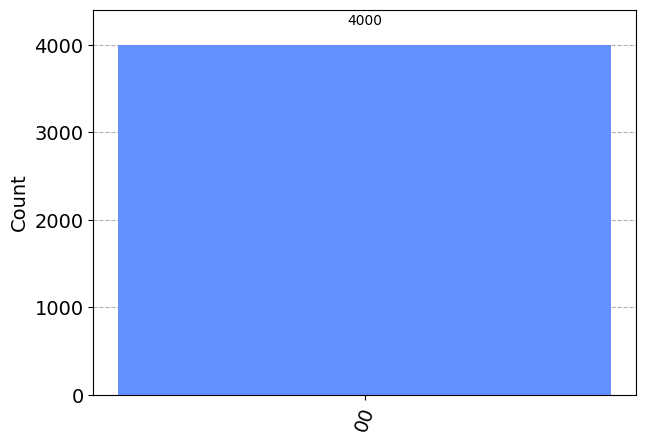

In [558]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

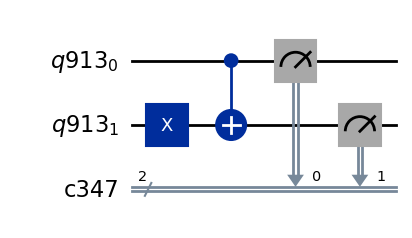

In [559]:
control_not_gate(0, 1).draw(output = 'mpl')

In [560]:
new_circuit = qiskit.transpile(control_not_gate(0, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'10': 4000}

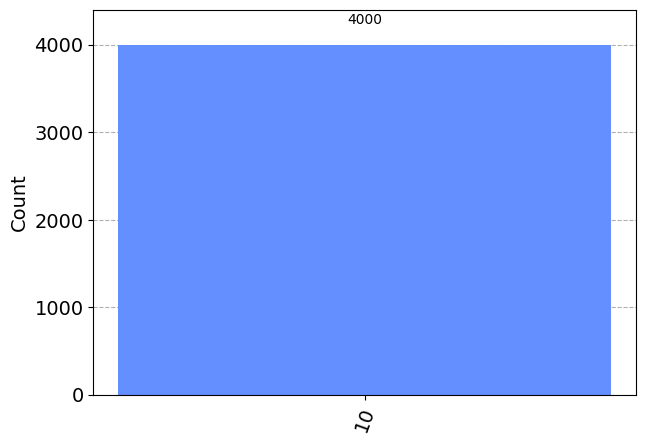

In [561]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

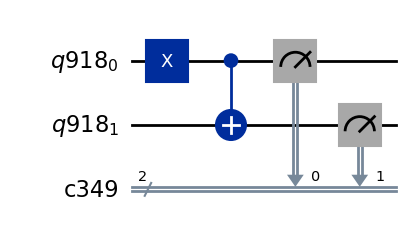

In [562]:
control_not_gate(1, 0).draw(output = 'mpl')

In [563]:
new_circuit = qiskit.transpile(control_not_gate(1, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'11': 4000}

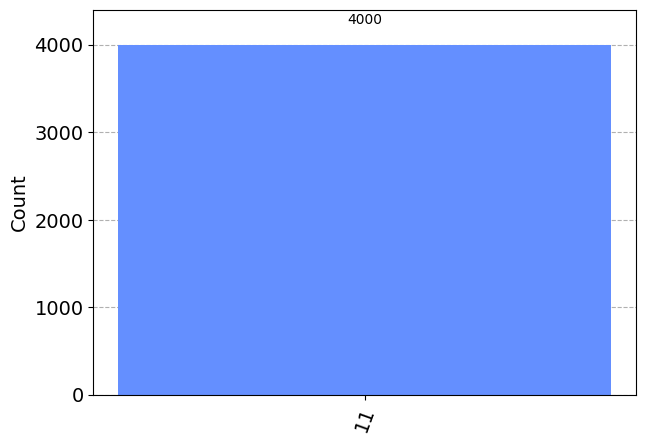

In [564]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

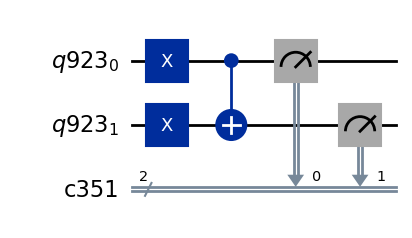

In [565]:
control_not_gate(1, 1).draw(output = 'mpl')

In [566]:
new_circuit = qiskit.transpile(control_not_gate(1, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'01': 4000}

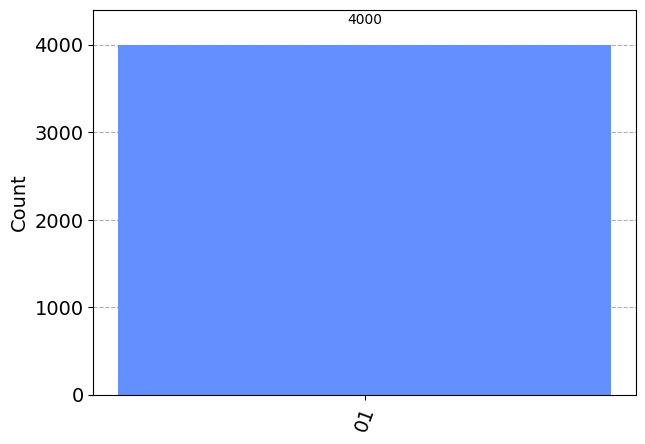

In [567]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

## Example for Bell State Gate

In [568]:
def bell_state_gate(q1, q2):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    qr = qiskit.QuantumRegister(2)
    cr = qiskit.ClassicalRegister(2)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)

    circuit.h(0)
    circuit.cx(0,1)
        
    circuit.measure(qr,cr) # Collapses qubit to either 1 or 0 w/ equal prob.
    return circuit

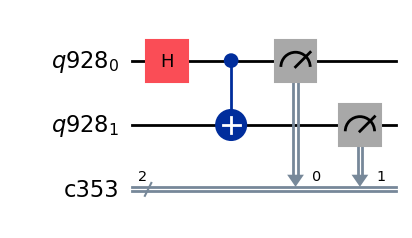

In [569]:
bell_state_gate(0, 0).draw(output = 'mpl')

In [570]:
new_circuit = qiskit.transpile(bell_state_gate(0, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'00': 1954, '11': 2046}

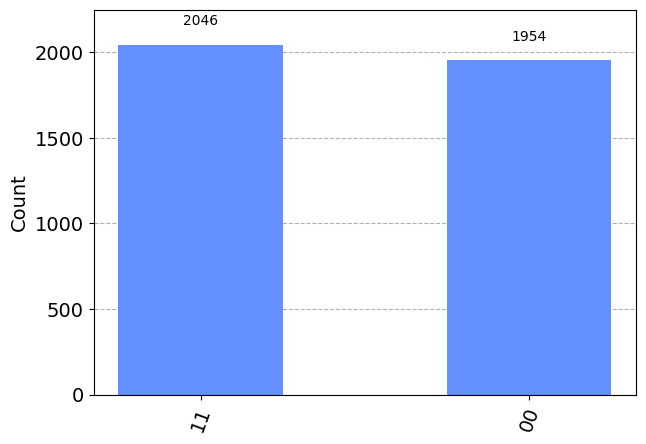

In [571]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

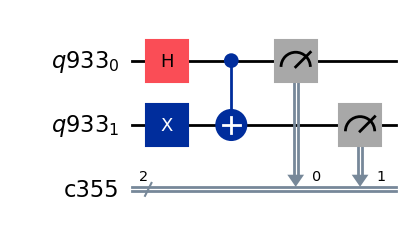

In [572]:
bell_state_gate(0, 1).draw(output = 'mpl')

In [573]:
new_circuit = qiskit.transpile(bell_state_gate(0, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'01': 1977, '10': 2023}

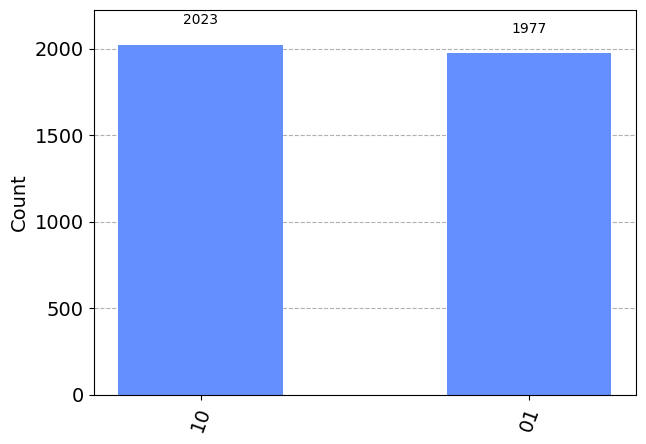

In [574]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

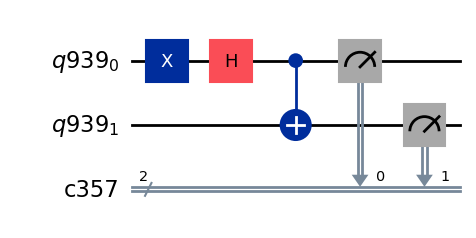

In [575]:
bell_state_gate(1, 0).draw(output = 'mpl')

In [576]:
new_circuit = qiskit.transpile(bell_state_gate(1, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'00': 2009, '11': 1991}

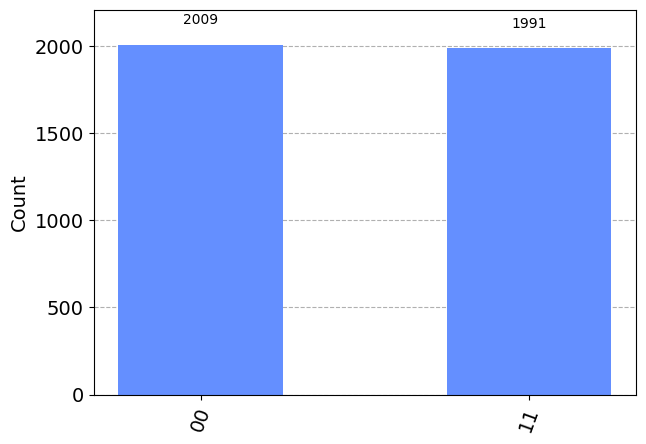

In [577]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

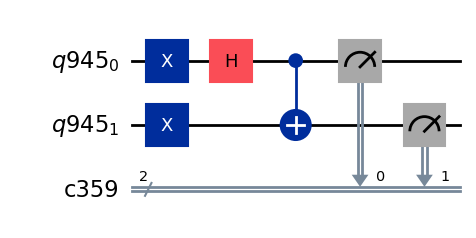

In [578]:
bell_state_gate(1, 1).draw(output = 'mpl')

In [579]:
new_circuit = qiskit.transpile(bell_state_gate(1, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'01': 2019, '10': 1981}

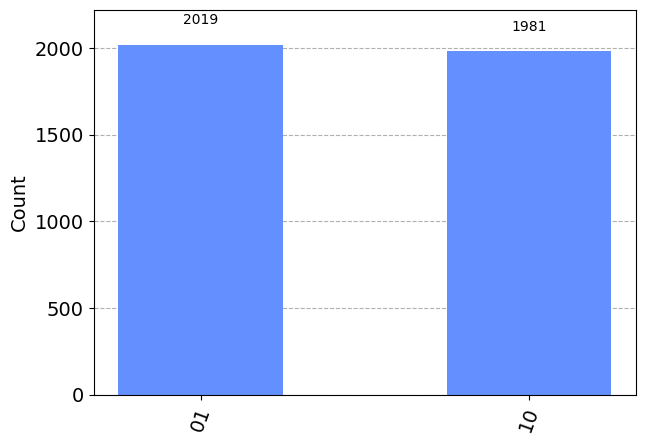

In [580]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

## Swap Gate

In [581]:
def swap_gate(q1, q2):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    
    qr = qiskit.QuantumRegister(2)
    cr = qiskit.ClassicalRegister(2)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)

    circuit.swap(0,1)

    circuit.measure(qr,cr)

    return circuit


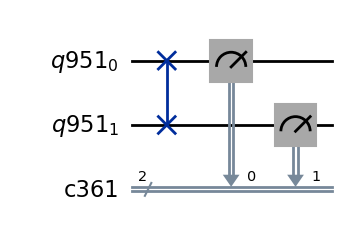

In [582]:
swap_gate(0, 0).draw(output = 'mpl')

In [583]:
new_circuit = qiskit.transpile(swap_gate(0, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'00': 4000}

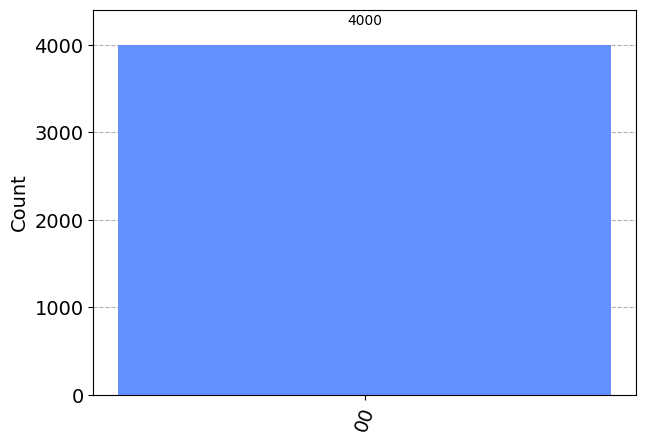

In [584]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

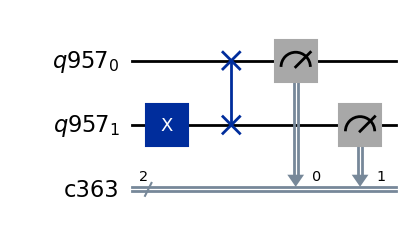

In [585]:
swap_gate(0, 1).draw(output = 'mpl')

In [586]:
new_circuit = qiskit.transpile(swap_gate(0, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'01': 4000}

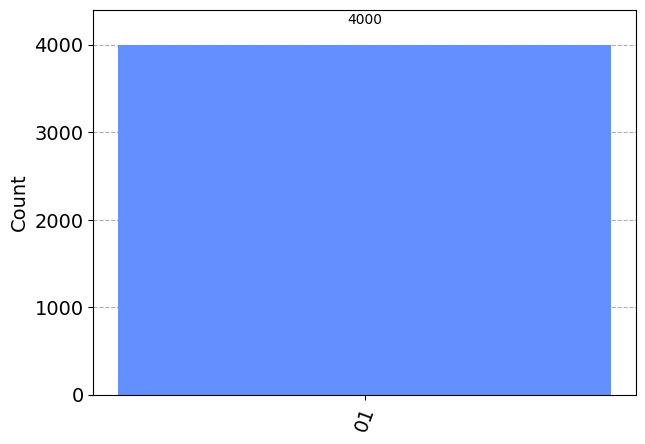

In [587]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

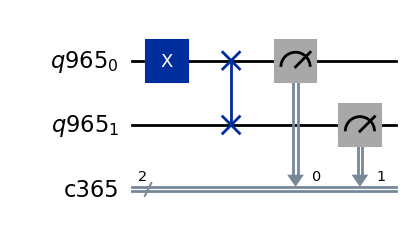

In [588]:
swap_gate(1, 0).draw(output = 'mpl')

In [589]:
new_circuit = qiskit.transpile(swap_gate(1, 0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'10': 4000}

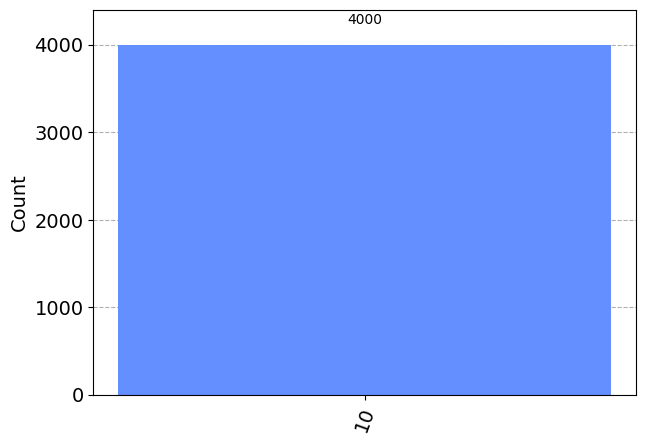

In [590]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

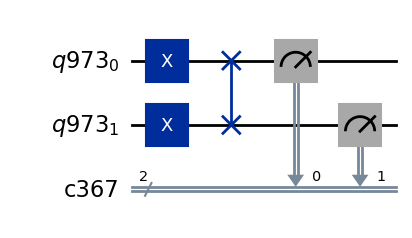

In [591]:
swap_gate(1, 1).draw(output = 'mpl')

In [592]:
new_circuit = qiskit.transpile(swap_gate(1, 1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'11': 4000}

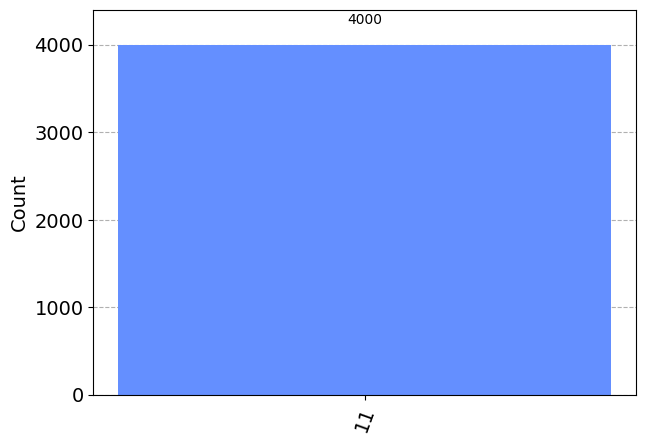

In [593]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

## Fredkin (Controlled-swap - CSWAP) Gate

In [594]:
def controlled_swap_gate(q1, q2,q3):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    if(q3 != 0 and q3 != 1):
        raise ValueError("q3 must be 0 or 1")
    
    qr = qiskit.QuantumRegister(3)
    cr = qiskit.ClassicalRegister(3)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)
    if(q3 == 1):
        circuit.x(2)

    circuit.cswap(0,1,2)

    circuit.measure(qr,cr)

    return circuit


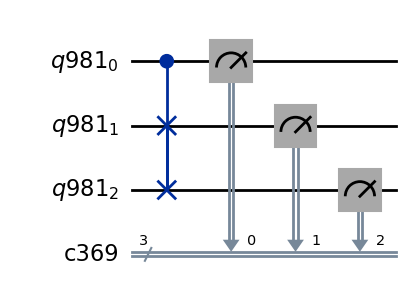

In [595]:
controlled_swap_gate(0,0,0).draw(output = 'mpl')

In [596]:
new_circuit = qiskit.transpile(controlled_swap_gate(0,0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'000': 4000}

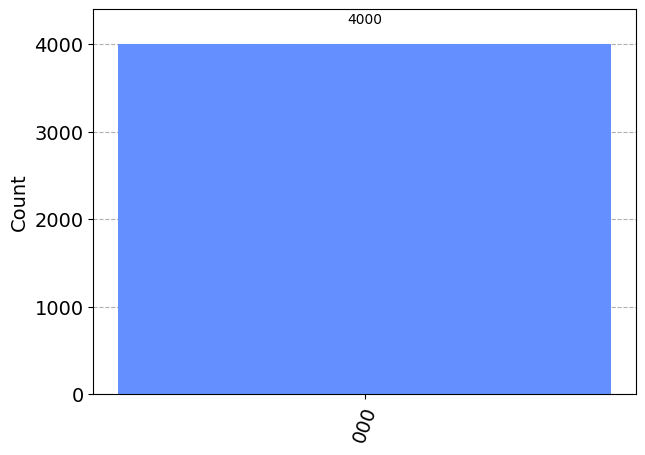

In [597]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

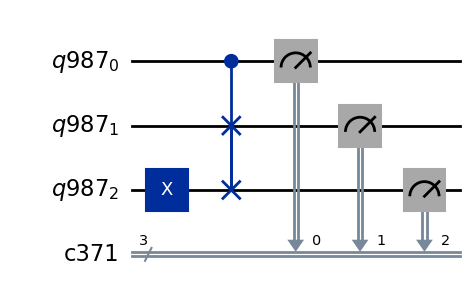

In [598]:
controlled_swap_gate(0,0,1).draw(output = 'mpl')

In [599]:
new_circuit = qiskit.transpile(controlled_swap_gate(0,0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'100': 4000}

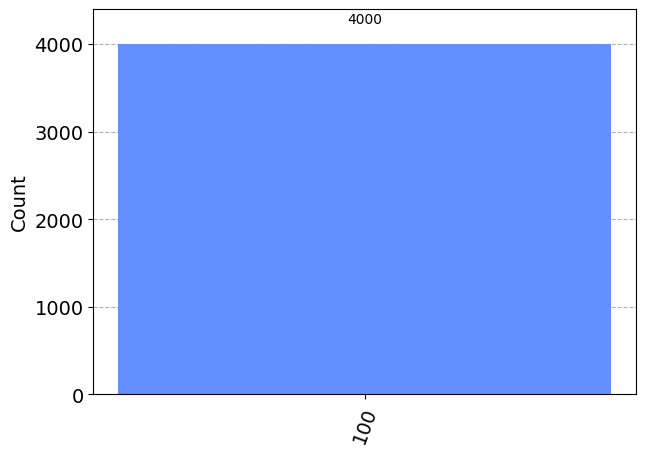

In [600]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

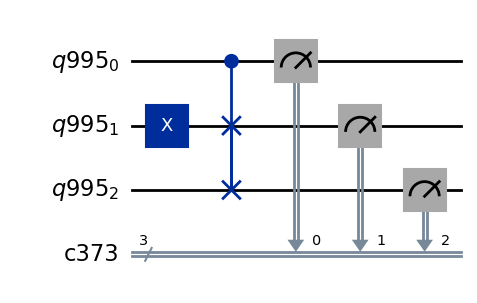

In [601]:
controlled_swap_gate(0,1,0).draw(output = 'mpl')

In [602]:
new_circuit = qiskit.transpile(controlled_swap_gate(0,1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'010': 4000}

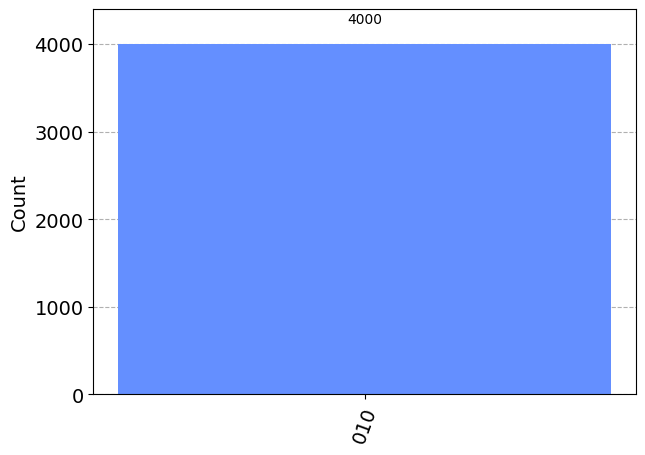

In [603]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

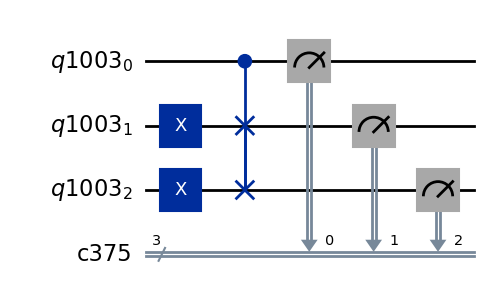

In [604]:
controlled_swap_gate(0,1,1).draw(output = 'mpl')

In [605]:
new_circuit = qiskit.transpile(controlled_swap_gate(0,1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'110': 4000}

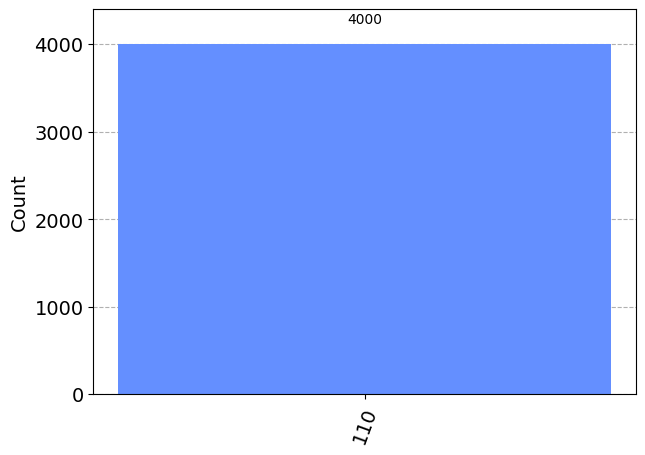

In [606]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

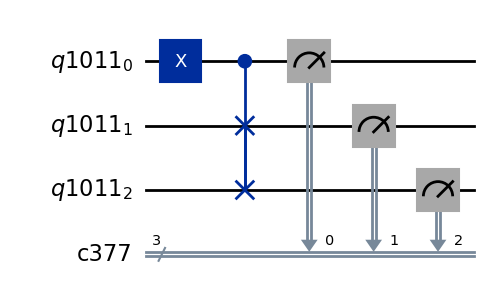

In [607]:
controlled_swap_gate(1,0,0).draw(output = 'mpl')

In [608]:
new_circuit = qiskit.transpile(controlled_swap_gate(1,0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'001': 4000}

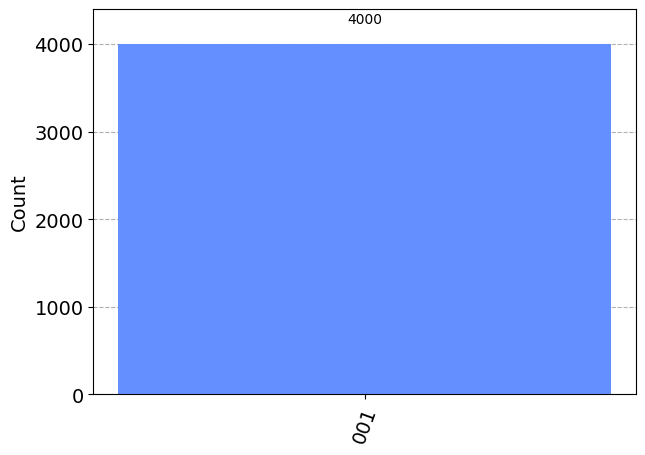

In [609]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

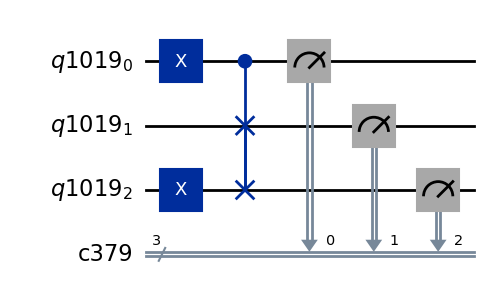

In [610]:
controlled_swap_gate(1,0,1).draw(output = 'mpl')

In [611]:
new_circuit = qiskit.transpile(controlled_swap_gate(1,0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'011': 4000}

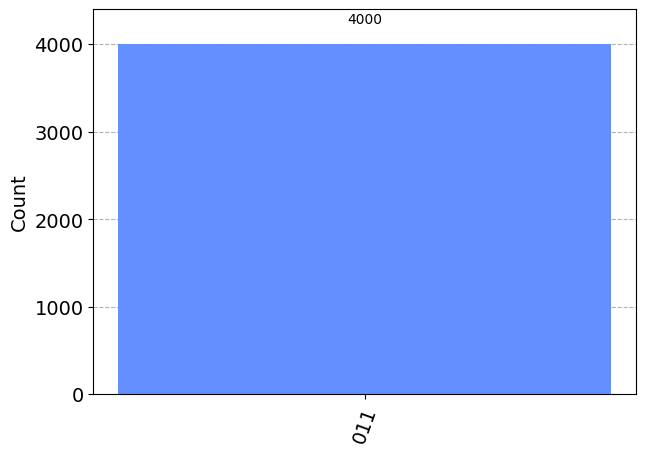

In [612]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

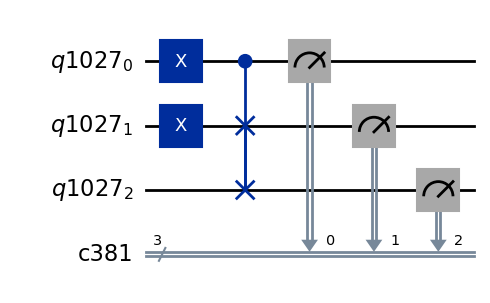

In [613]:
controlled_swap_gate(1,1,0).draw(output = 'mpl')

In [614]:
new_circuit = qiskit.transpile(controlled_swap_gate(1,1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'101': 4000}

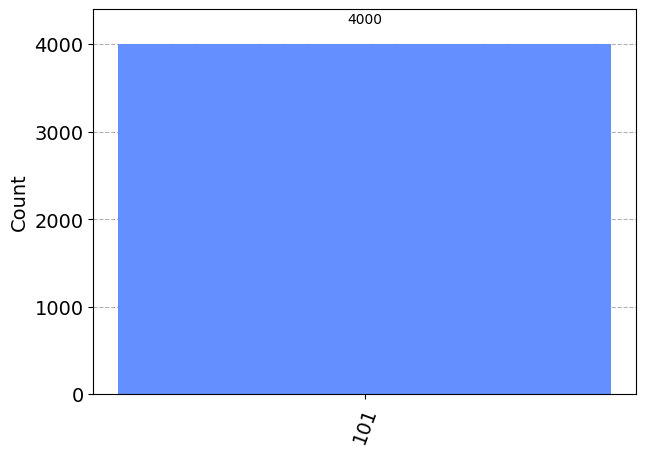

In [615]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

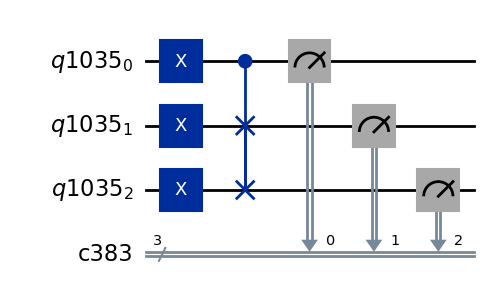

In [616]:
controlled_swap_gate(1,1,1).draw(output = 'mpl')

In [617]:
new_circuit = qiskit.transpile(controlled_swap_gate(1,1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'111': 4000}

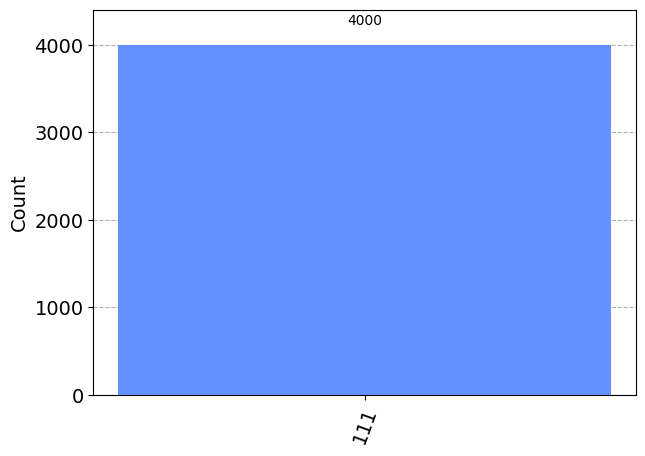

In [618]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

## AND Gate

In [619]:
def and_gate(q1, q2):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    
    qr = qiskit.QuantumRegister(3)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)

    circuit.cswap(0,1,2)

    circuit.measure(qr[2],cr)

    return circuit


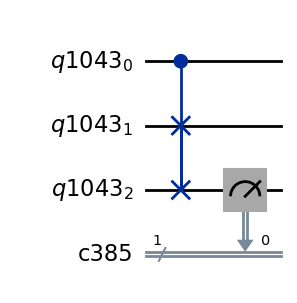

In [620]:
and_gate(0,0).draw(output = 'mpl')

In [621]:
new_circuit = qiskit.transpile(and_gate(0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'0': 4000}

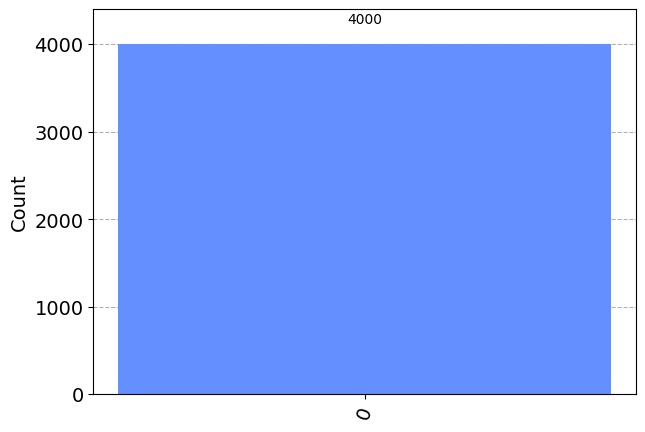

In [622]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

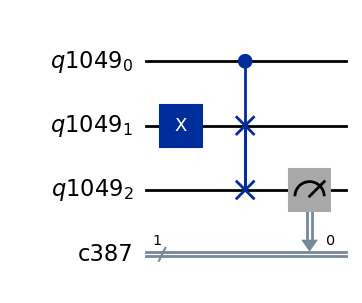

In [623]:
and_gate(0,1).draw(output = 'mpl')

In [624]:
new_circuit = qiskit.transpile(and_gate(0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'0': 4000}

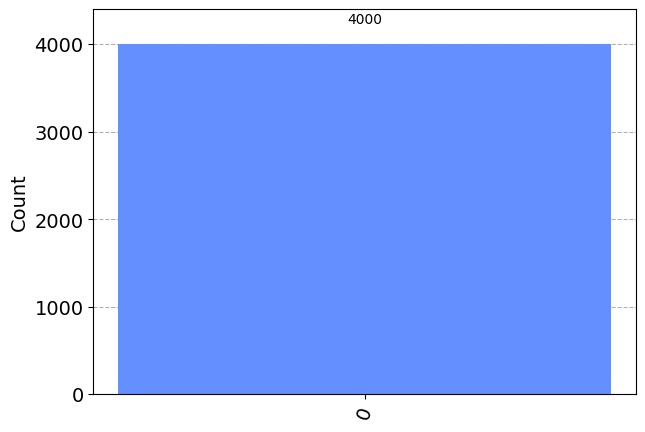

In [625]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

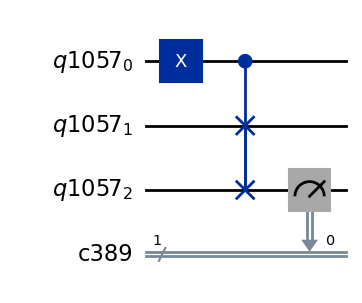

In [626]:
and_gate(1,0).draw(output = 'mpl')

In [627]:
new_circuit = qiskit.transpile(and_gate(1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'0': 4000}

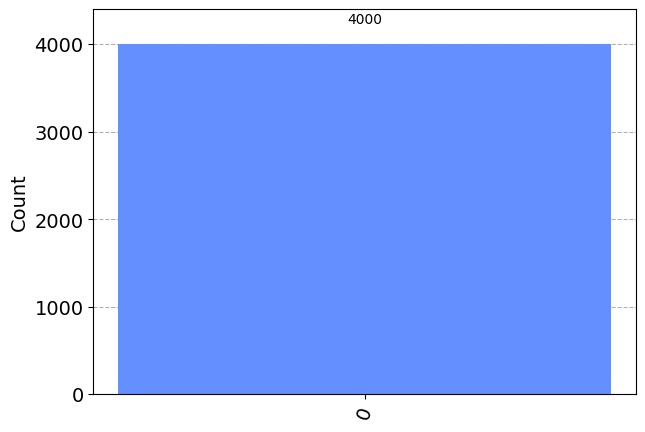

In [628]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

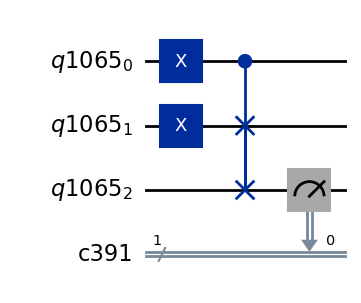

In [629]:
and_gate(1,1).draw(output = 'mpl')

In [630]:
new_circuit = qiskit.transpile(and_gate(1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'1': 4000}

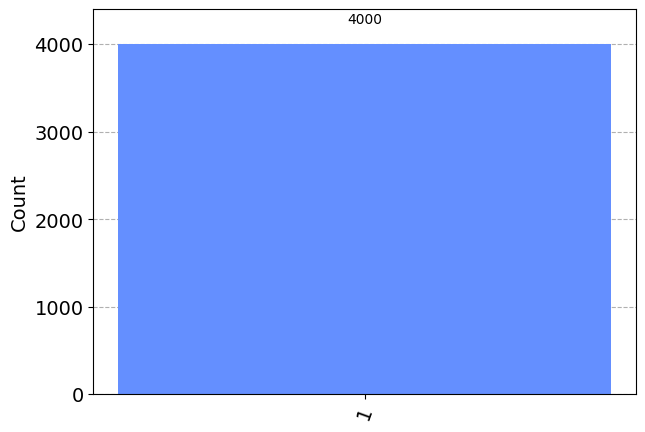

In [631]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

In [632]:
def toffoli_gate(q1, q2,q3):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    if(q3 != 0 and q3 != 1):
        raise ValueError("q3 must be 0 or 1")
    
    qr = qiskit.QuantumRegister(3)
    cr = qiskit.ClassicalRegister(3)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)
    if(q3 == 1):
        circuit.x(2)

    circuit.ccx(0,1,2)

    circuit.measure(qr,cr)

    return circuit


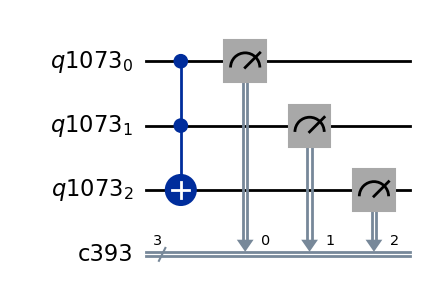

In [633]:
toffoli_gate(0,0,0).draw(output = 'mpl')

In [634]:
new_circuit = qiskit.transpile(toffoli_gate(0,0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'000': 4000}

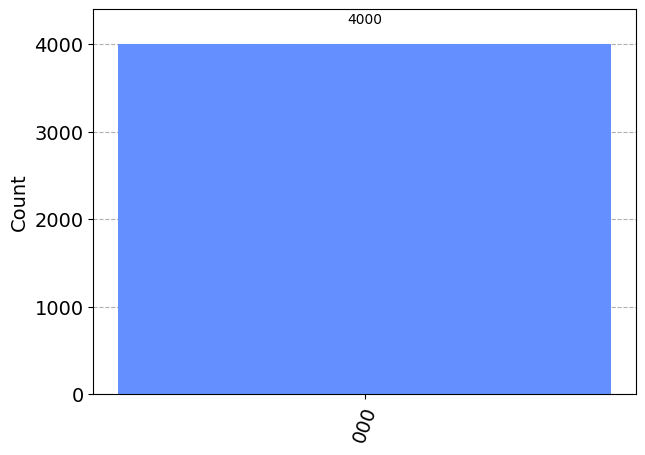

In [635]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

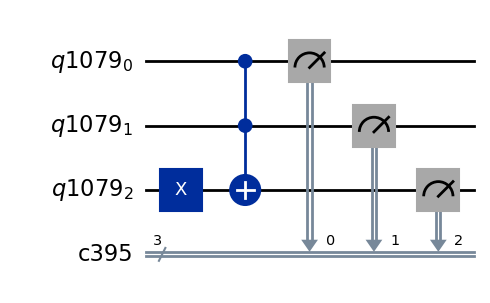

In [636]:
toffoli_gate(0,0,1).draw(output = 'mpl')

In [637]:
new_circuit = qiskit.transpile(toffoli_gate(0,0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'100': 4000}

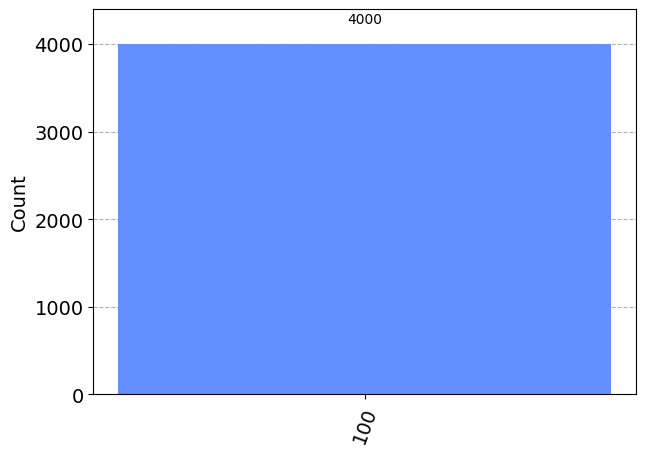

In [638]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

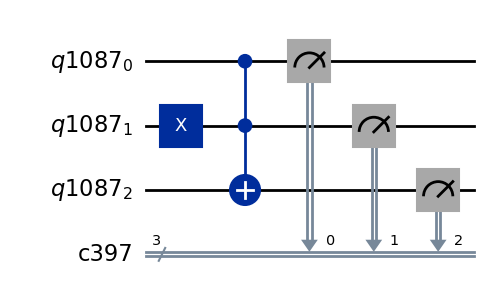

In [639]:
toffoli_gate(0,1,0).draw(output = 'mpl')

In [640]:
new_circuit = qiskit.transpile(toffoli_gate(0,1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'010': 4000}

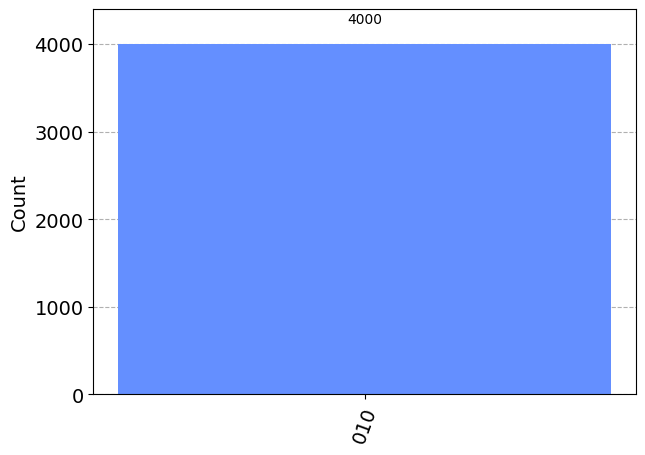

In [641]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

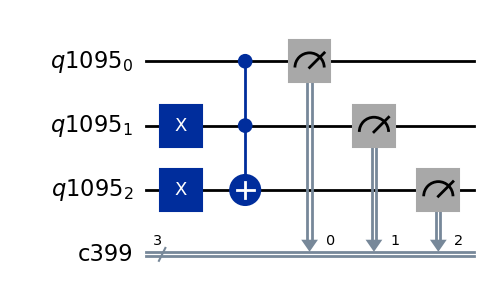

In [642]:
toffoli_gate(0,1,1).draw(output = 'mpl')

In [643]:
new_circuit = qiskit.transpile(toffoli_gate(0,1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'110': 4000}

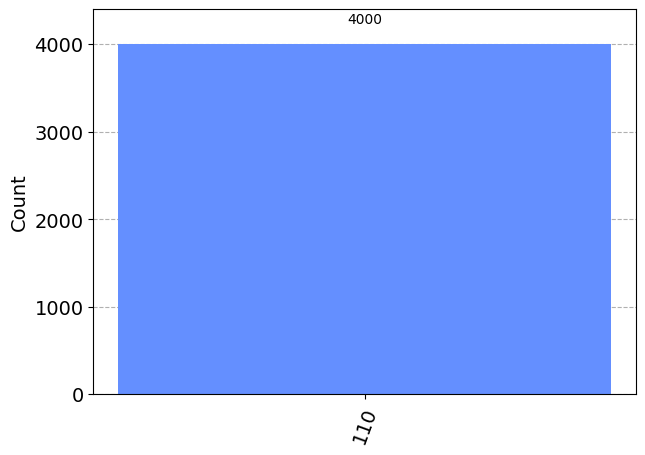

In [644]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

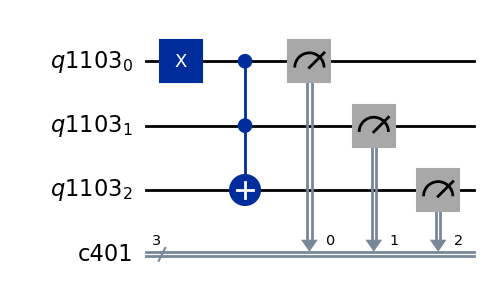

In [645]:
toffoli_gate(1,0,0).draw(output = 'mpl')

In [646]:
new_circuit = qiskit.transpile(toffoli_gate(1,0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'001': 4000}

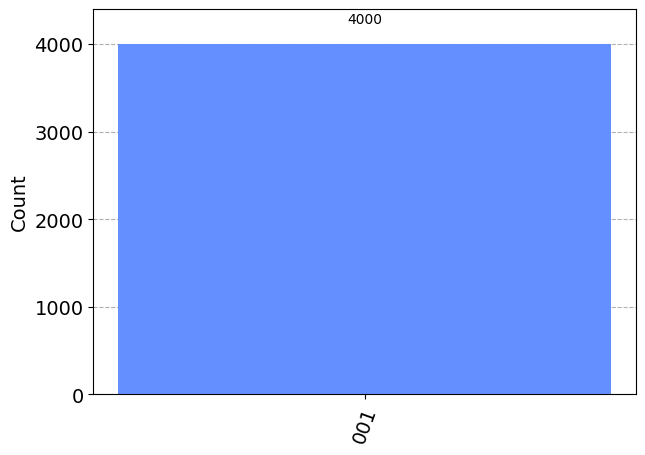

In [647]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

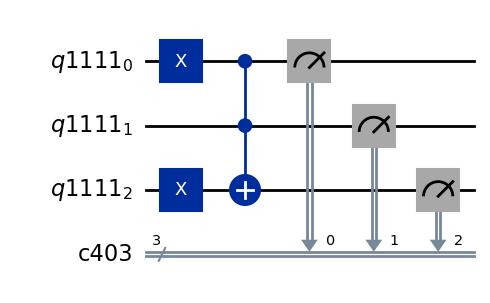

In [648]:
toffoli_gate(1,0,1).draw(output = 'mpl')

In [649]:
new_circuit = qiskit.transpile(toffoli_gate(1,0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'101': 4000}

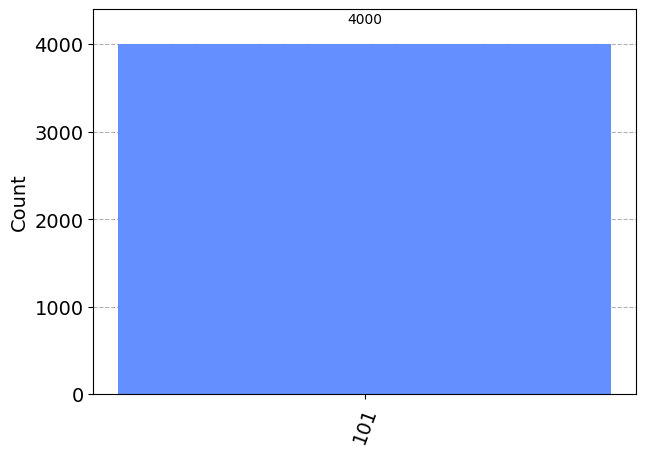

In [650]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

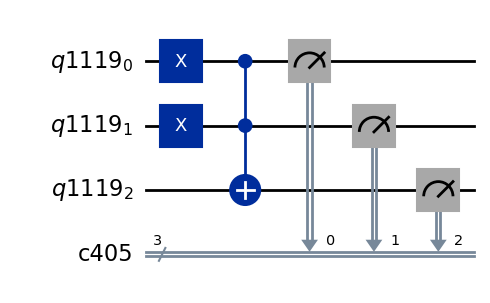

In [651]:
toffoli_gate(1,1,0).draw(output = 'mpl')

In [652]:
new_circuit = qiskit.transpile(toffoli_gate(1,1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'111': 4000}

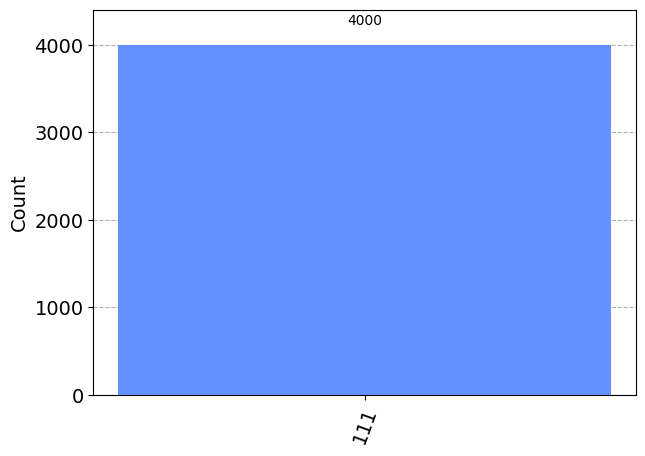

In [653]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

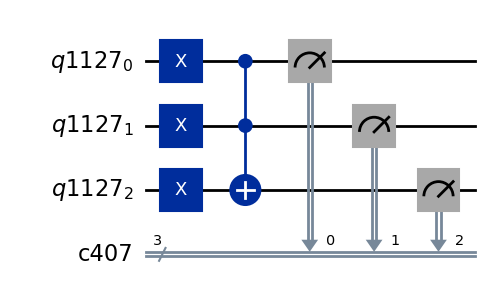

In [654]:
toffoli_gate(1,1,1).draw(output = 'mpl')

In [655]:
new_circuit = qiskit.transpile(toffoli_gate(1,1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'011': 4000}

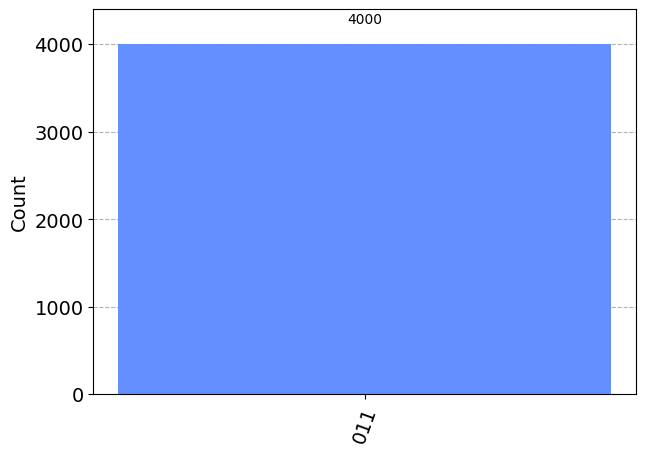

In [656]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

In [657]:
def nand_gate(q1, q2):
    if(q1 != 0 and q1 != 1):
        raise ValueError("q1 must be 0 or 1")
    if(q2 != 0 and q2 != 1):
        raise ValueError("q2 must be 0 or 1")
    
    qr = qiskit.QuantumRegister(3)
    cr = qiskit.ClassicalRegister(1)
    circuit = qiskit.QuantumCircuit(qr, cr)
    if(q1 == 1):
        circuit.x(0)
    if(q2 == 1):
        circuit.x(1)

    
    circuit.x(2)

    circuit.ccx(0,1,2)

    circuit.measure(qr[2],cr)

    return circuit


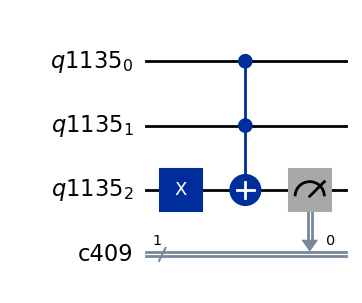

In [658]:
nand_gate(0,0).draw(output = 'mpl')

In [659]:
new_circuit = qiskit.transpile(nand_gate(0,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'1': 4000}

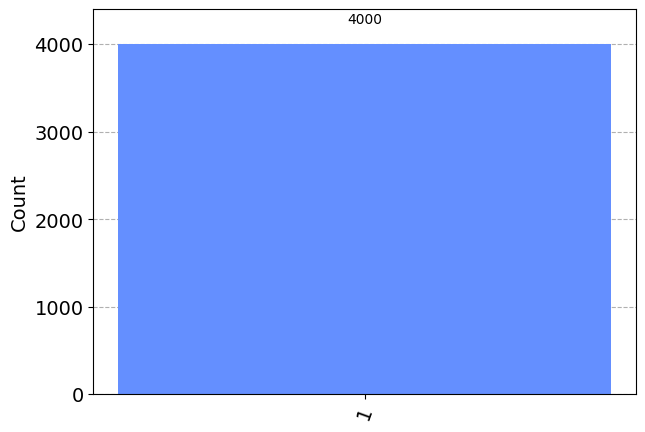

In [660]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

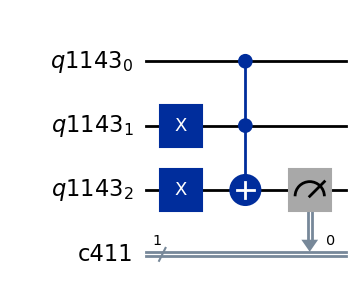

In [661]:
nand_gate(0,1).draw(output = 'mpl')

In [662]:
new_circuit = qiskit.transpile(nand_gate(0,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'1': 4000}

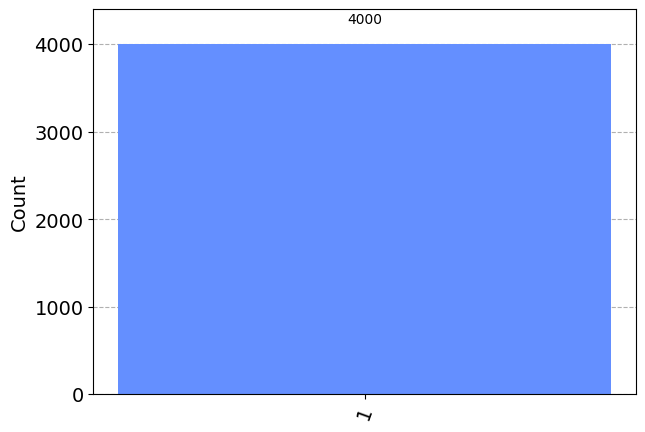

In [663]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

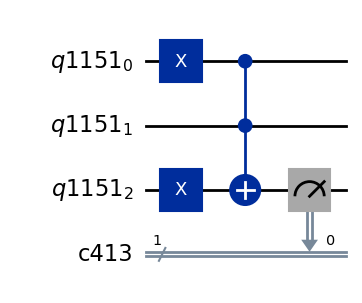

In [664]:
nand_gate(1,0).draw(output = 'mpl')

In [665]:
new_circuit = qiskit.transpile(nand_gate(1,0), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'1': 4000}

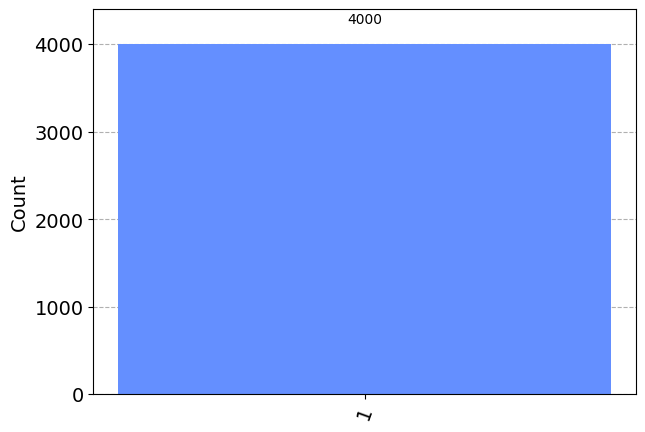

In [666]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')

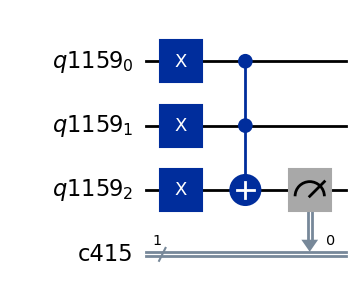

In [667]:
nand_gate(1,1).draw(output = 'mpl')

In [668]:
new_circuit = qiskit.transpile(nand_gate(1,1), backend)
job = backend.run(new_circuit)

result = job.result()

result.get_counts()

{'0': 4000}

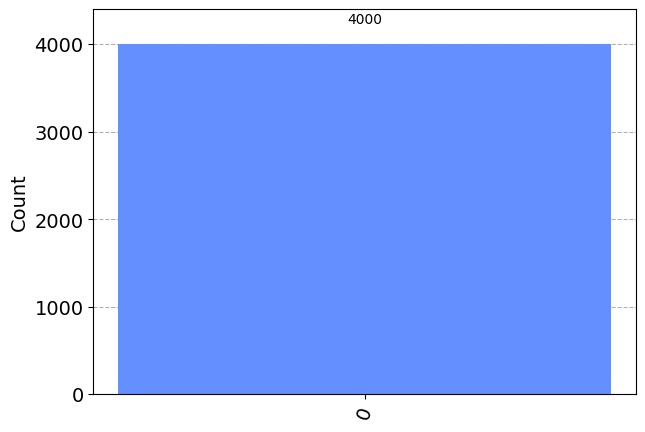

In [669]:
qiskit.visualization.plot_histogram(result.get_counts(), sort='value_desc')